In [23]:
import sklearn
import numpy as np
import pandas as pd
import classes.clean_tabular as ct

facebook = ct.Marketplace()

if facebook.not_already_downloaded():
    print("Go online and get data")
    facebook.connect_to_RDS_engine()
    print("Remove N/A categories")
    facebook.remove_n_a_records('category')
    col = 'category'
    char = '/'
    num = facebook.main_df[col].str.count(char).max()+1
    print("Split Heirarchies")
    facebook.split_heirarchies(col, char, num)
    col = 'product_name'
    char = ' in '
    num = facebook.main_df[col].str.count(char).max()+1
    facebook.split_heirarchies(col, char, num)
    print("Get rid of extra columns")
    facebook.clean_columns(num)
    print("Create the numbers dataframe")
    facebook.create_num_df()
    print("Geocoding locations - this may take some time")
    facebook.geocode_locations()
    print("And finally, output to csv")
    facebook.num_df.to_csv(r"data/Geocoded.csv")
else:
    facebook.load_all_existing_data_to_dfs()


Existing data found


In [24]:
print(facebook.num_df)

      Unnamed: 0                                    id  \
0              1  243809c0-9cfc-4486-ad12-3b7a16605ba9   
1              2  1c58d3f9-8b93-47ea-9415-204fcc2a22e6   
2              3  860673f1-57f6-47ba-8d2f-13f9e05b8f9a   
3              4  59948726-29be-4b35-ade5-bb2fd7331856   
4              5  16dbc860-696e-4cda-93f6-4dd4926573fb   
...          ...                                   ...   
11313       8085  c4148656-78a9-4f3e-b393-134fdc5ef900   
11314       8086  564e3411-768d-4250-a624-b119d696f103   
11315       8088  2b0a652b-46a2-4297-b619-5efeeb222787   
11316       8089  719fd40a-870e-4144-b324-55dff2e66fb4   
11317       8090  86d1806b-5575-4a7e-9160-f24f12be6c95   

                                     product_description   price  \
0      Mirror wall art. Posted by Nisha in Dining, Li...    5.00   
1      Morphy Richard’s (model no 48755)Stainless ste...   20.00   
2      I have 2 of these - collection only as I don’t...   20.00   
3      Great reclaimed army amm

<AxesSubplot:>

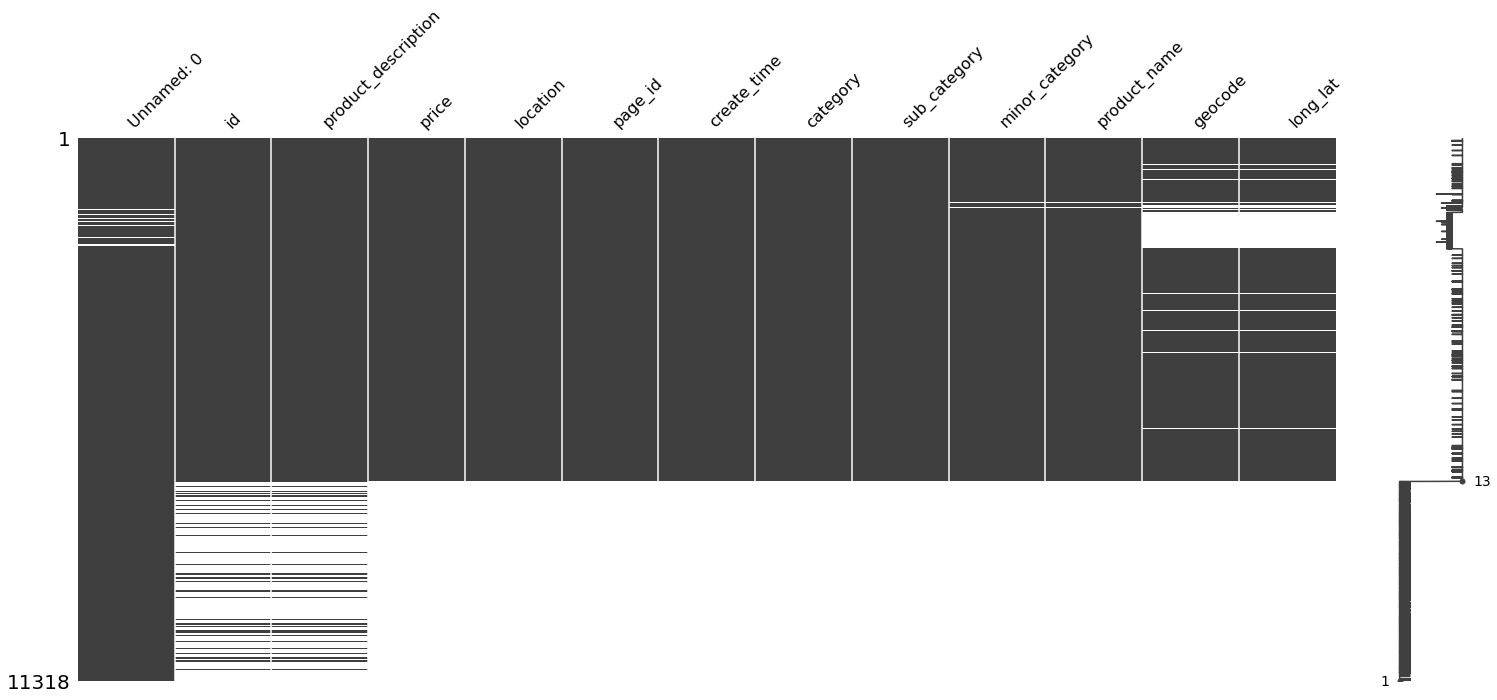

In [25]:
import missingno as msno
facebook.num_df = facebook.num_df.sort_values(by=['price'])
msno.matrix(facebook.num_df)


<AxesSubplot:>

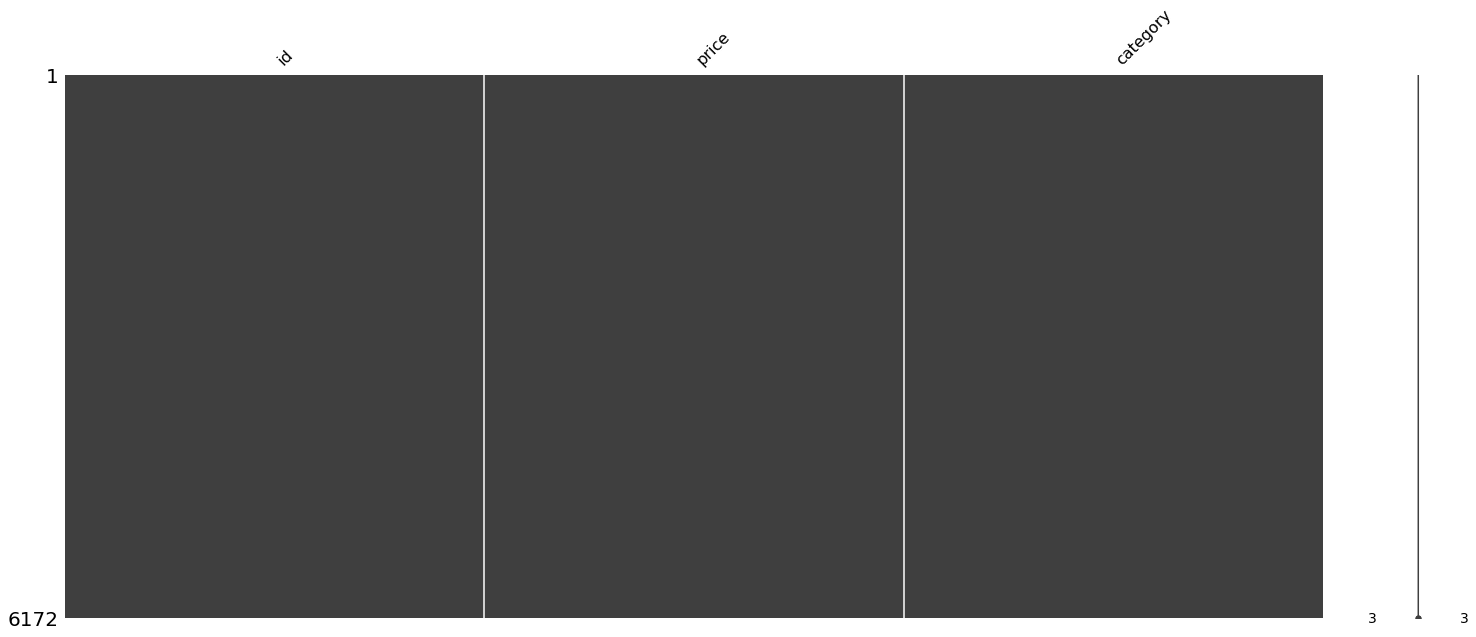

In [26]:
clean_df = facebook.num_df.dropna()
clean_df = clean_df.drop(
    ['product_description',
    'location',
    'page_id',
    'create_time',
    'product_name',
    'Unnamed: 0',
    'sub_category',
    'minor_category',
    'geocode',
    'long_lat'],
    axis=1)
msno.matrix(clean_df)

In [27]:
print(clean_df)

                                         id   price  category
4436   f9e4fc1c-175a-4046-bd31-1821f46e6445    0.00      11.0
784    8910d61d-35d6-4a70-92df-2d503ddea926    0.00       5.0
3122   cf7ae00e-90f7-4652-b01e-8e5a6477bd2e    0.00       6.0
3192   046b1534-919b-4181-a50d-22f09526ad88    0.00       6.0
10209  3306c04f-f217-46be-b424-cd11ea1ff9dd    0.00       8.0
...                                     ...     ...       ...
8059   daf20f20-fc25-460e-aeea-e1a1aa3fada6  999.00       0.0
2423   f6687cd1-6d1f-4201-b9f9-7fc12438cfc7  999.00      10.0
10497  94e88043-8417-47cb-b1b7-f8e4ba870006  999.00       4.0
10315  5cc4b6c8-08f5-4751-8483-e810c7f47818  999.99       8.0
10285  7f6921df-7140-4592-934d-baf2e2d16037  999.99       8.0

[6172 rows x 3 columns]


(array([6.168e+03, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([       0.,  1000000.,  2000000.,  3000000.,  4000000.,  5000000.,
         6000000.,  7000000.,  8000000.,  9000000., 10000000.]),
 <BarContainer object of 10 artists>)

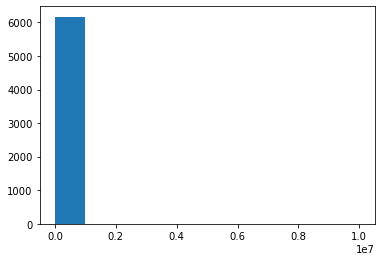

In [35]:
import matplotlib.pyplot as plt

# remove commas from price values
clean_df['price'] = clean_df['price'].replace(',','', regex=True)
clean_df['price'] = clean_df['price'].astype(float)
plt.hist(clean_df['price'], bins=10)


In [34]:
clean_df

,id,price,category
4436,f9e4fc1c-175a-4046-bd31-1821f46e6445,0.00,11.0
784,8910d61d-35d6-4a70-92df-2d503ddea926,0.00,5.0
3122,cf7ae00e-90f7-4652-b01e-8e5a6477bd2e,0.00,6.0
3192,046b1534-919b-4181-a50d-22f09526ad88,0.00,6.0
10209,3306c04f-f217-46be-b424-cd11ea1ff9dd,0.00,8.0
...,...,...,...
8059,daf20f20-fc25-460e-aeea-e1a1aa3fada6,999.00,0.0
2423,f6687cd1-6d1f-4201-b9f9-7fc12438cfc7,999.00,10.0
10497,94e88043-8417-47cb-b1b7-f8e4ba870006,999.00,4.0
10315,5cc4b6c8-08f5-4751-8483-e810c7f47818,999.99,8.0
